In [1]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt

from src.constants import *
from src.utils import list_files
from src.processing.txt_loading import txt_to_list
from src.processing.radial import radial_select, order_coords

## 1. Setup

In [2]:
image_name = '200920_biolight_nobg_nooutliers_despeckle_enhance.tif'
slice = 160

## 2. Analysis

In [3]:
image_path = BUCKLING_PATH / image_name
assert image_path.exists()

Load image

In [4]:
image = imread(str(image_path))[slice]

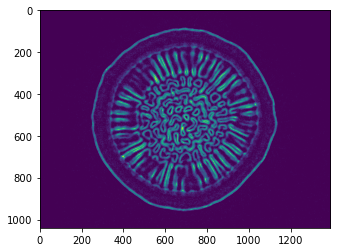

In [5]:
plt.imshow(image)

In [6]:
height, width = np.shape(image)

In [7]:
timestamps_b, radii_b, x_center_b, y_center_b = txt_to_list('200920_biolight_fitted_circle_position_data.txt')
x_center, y_center = x_center_b[slice], y_center_b[slice]
center_fitted = (x_center, y_center)

In [8]:
#(disk_y_coords, disk_x_coords, disk_values) = radial_select(image, center_fitted, 100, 0.5)
disk_x_y_vals = np.array(radial_select(image, center_fitted, 100, 0.5))

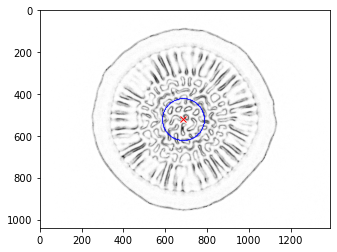

In [9]:
plt.imshow(image, cmap = 'Greys')
#plt.plot(x_centre, y_centre, 'xr')
plt.plot(disk_x_y_vals[1], disk_x_y_vals[0], 'bo',markersize = 0.1)
plt.plot(x_center, y_center, 'xr')
plt.show()

In [10]:
np.shape(disk_x_y_vals)

(3, 632)

In [11]:
stack = order_coords(disk_x_y_vals[0], disk_x_y_vals[1], disk_x_y_vals[2], center_fitted)
stack

array([[585.        , 585.        , 585.        , ..., 585.        ,
        585.        , 585.        ],
       [519.        , 518.        , 517.        , ..., 522.        ,
        521.        , 520.        ],
       [  0.        ,   0.        ,   0.        , ...,   7.        ,
          7.        ,   7.        ],
       [ -3.1349408 ,  -3.12490825,  -3.11487906, ...,   3.1181469 ,
          3.12817741,   3.13821062]])

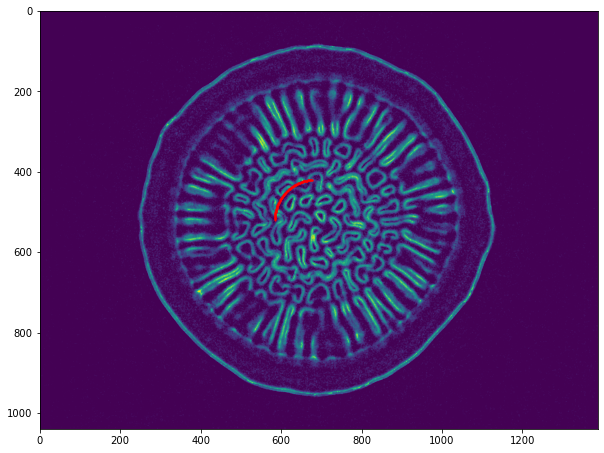

In [12]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
ax.imshow(image)
ax.plot(stack[0][0:150], stack[1][0:150], 'ro', ms = 1)
ax.set_aspect('equal')
plt.show()

In [ ]:
profile = radial_profile(image, (x, y))


#print(profile[10:20])
fig, (ax1, ax2) = plt.subplots(1,2)
#ax2 = plt.gca()
ax2.set_xlim(0.0, width)
ax2.set_ylim(height,0.0)
ax2.imshow(image, cmap = 'Greys')
#ax2.plot(center[1], center[0], 'xg')
ax2.plot(x, y, 'xr')
ax1.plot(profile)
plt.show()